In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import re
import seaborn as sns

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/Kaiquerdg/netflix_database/main/netflix_titles_nov_2019.csv")

df = df.drop("description", axis=1)
df = df.drop("show_id", axis=1)
df = df.drop("rating", axis=1)

df = df.set_index("title")

In [ ]:
df["date_added"] = pd.to_datetime(df["date_added"], format='%B %d, %Y')
df["date_added"] = df["date_added"].dt.strftime('%d de %B de %Y')

In [ ]:
df = df.dropna(subset = ["date_added"])
df = df.dropna(subset = ["release_year"])
df["date_added"] = pd.to_datetime(df["date_added"], format='%d de %B de %Y')
df["year_added"] = df["date_added"].dt.year.astype(int)
df = df.drop("date_added", axis=1)
df

,director,cast,country,release_year,duration,listed_in,type,year_added
title,,,,,,,,
Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,2019,1 Season,"International TV Shows, Korean TV Shows, Roman...",TV Show,2019
Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,2019,67 min,"Documentaries, International Movies",Movie,2019
The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,2019,135 min,"Comedies, Dramas, International Movies",Movie,2019
Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium",2019,106 min,"Dramas, Independent Movies, International Movies",Movie,2019
Crazy people,Moses Inwang,"Ramsey Nouah, Chigul, Sola Sobowale, Ireti Doy...",Nigeria,2018,107 min,"Comedies, International Movies, Thrillers",Movie,2019
...,...,...,...,...,...,...,...,...
Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,1987,84 min,"Cult Movies, Horror Movies",Movie,2010
Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,2009,29 min,Horror Movies,Movie,2009
Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,2007,104 min,"Dramas, International Movies",Movie,2009


Text(0, 0.5, 'Quantidade de lançamentos')

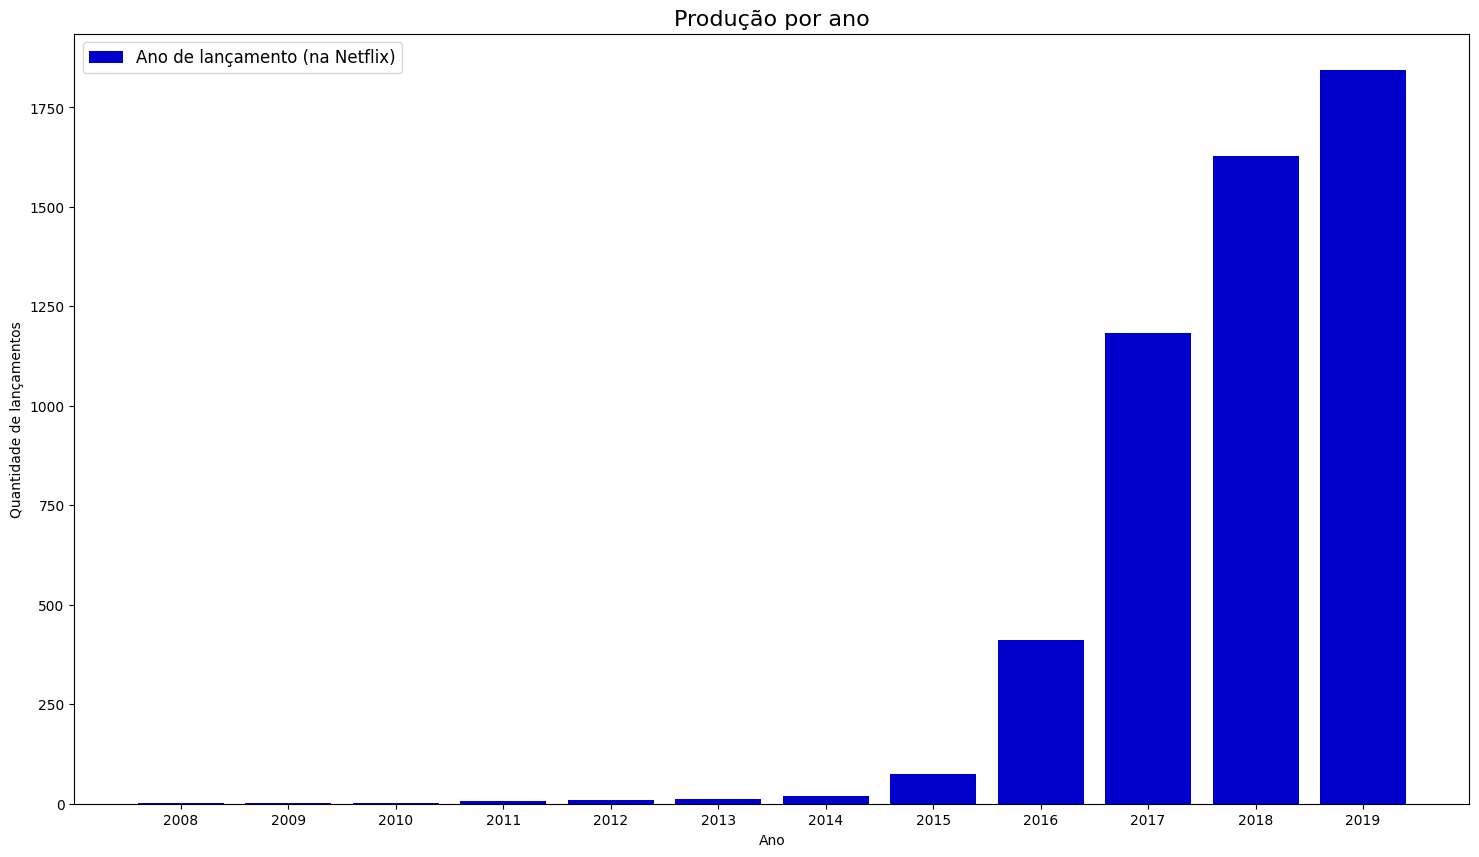

In [ ]:
qtd_anos = df["year_added"].unique()

fig, ax = plt.subplots(figsize = (18, 10))
ax.bar(qtd_anos, df["year_added"].value_counts(), label = "Ano de lançamento (na Netflix)", color = "mediumblue")
plt.xticks(qtd_anos)

ax.legend(fontsize = 12)
ax.set_title("Produção por ano", fontsize = 16)

ax.set_xlabel("Ano")
ax.set_ylabel("Quantidade de lançamentos")

In [ ]:
df_filme = df.loc[df["type"] == "Movie"]
df_filme["movie_duration"] = df_filme["duration"].apply(lambda x: ''.join(re.findall(r'\d+', str(x))))
df_filme["movie_duration"] = df_filme["movie_duration"].str.replace('[^\d]', '')
df_filme["movie_duration"] = df_filme["movie_duration"].astype(int)
df_filme = df_filme.drop("duration", axis=1)

df_serie = df.loc[df["type"] == "TV Show"]
df_quali_filme = df_filme.drop(df_filme.describe().columns, axis="columns")
df_quanti_filme = df_filme.drop(df_quali_filme.columns, axis="columns")
df_quali_serie = df_serie.drop(df_serie.describe().columns, axis="columns")
df_quanti_serie = df_serie.drop(df_quali_serie.columns, axis="columns")

<ipython-input-27-c0ab61ed1f10>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filme["movie_duration"] = df_filme["duration"].apply(lambda x: ''.join(re.findall(r'\d+', str(x))))
<ipython-input-27-c0ab61ed1f10>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_filme["movie_duration"] = df_filme["movie_duration"].str.replace('[^\d]', '')
<ipython-input-27-c0ab61ed1f10>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filme["movie_duration"] = df_fil

Text(0.5, 1.0, 'Gráfico de Correlação dos Filmes')

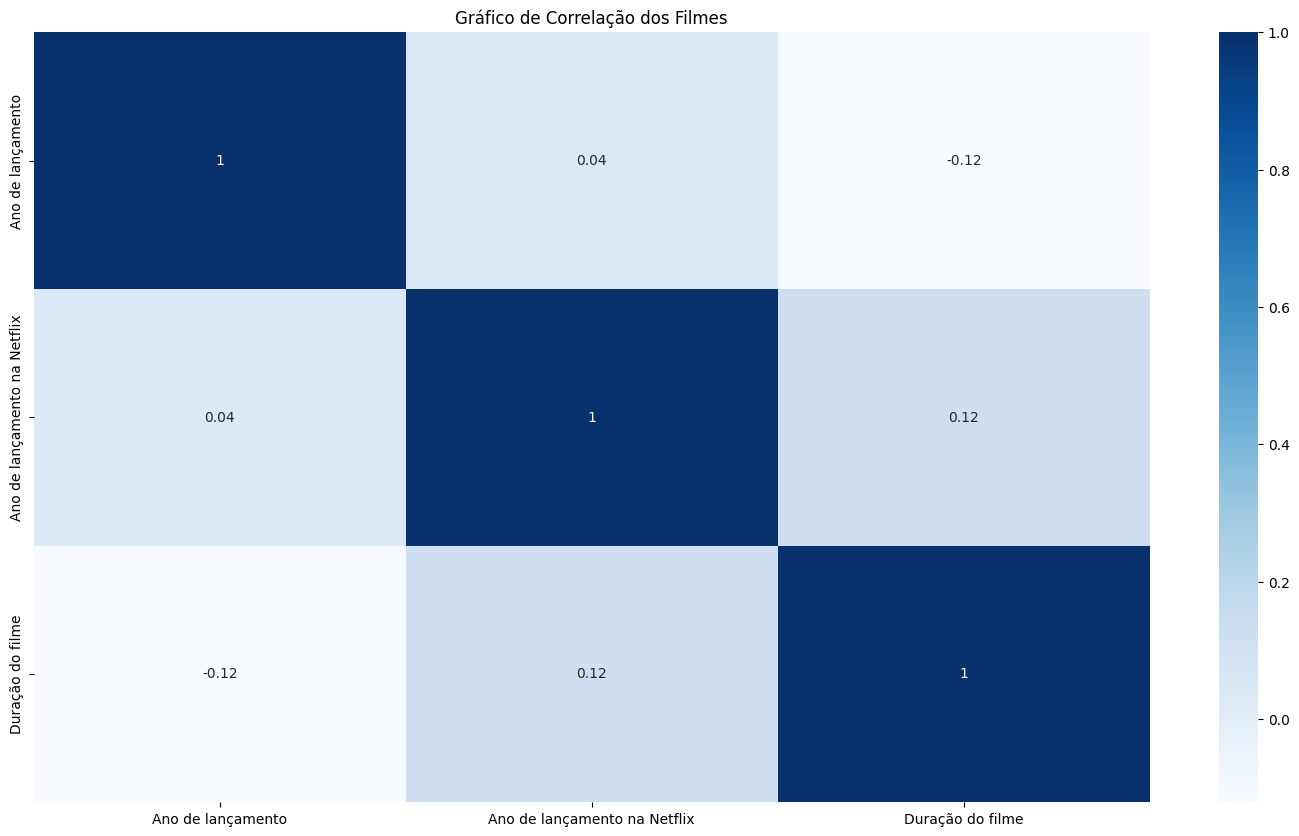

In [ ]:
df_quanti_filme = df_quanti_filme.rename(columns={'release_year': 'Ano de lançamento',
                        'year_added': 'Ano de lançamento na Netflix',
                        'movie_duration': 'Duração do filme'})

fig, ax = plt.subplots(figsize = (18, 10))
correlation_matrix_movie = df_quanti_filme.corr()

sns.heatmap(correlation_matrix_movie, annot=True, cmap='Blues')
plt.title('Gráfico de Correlação dos Filmes')

Text(0.5, 1.0, 'Gráfico de Correlação das Séries')

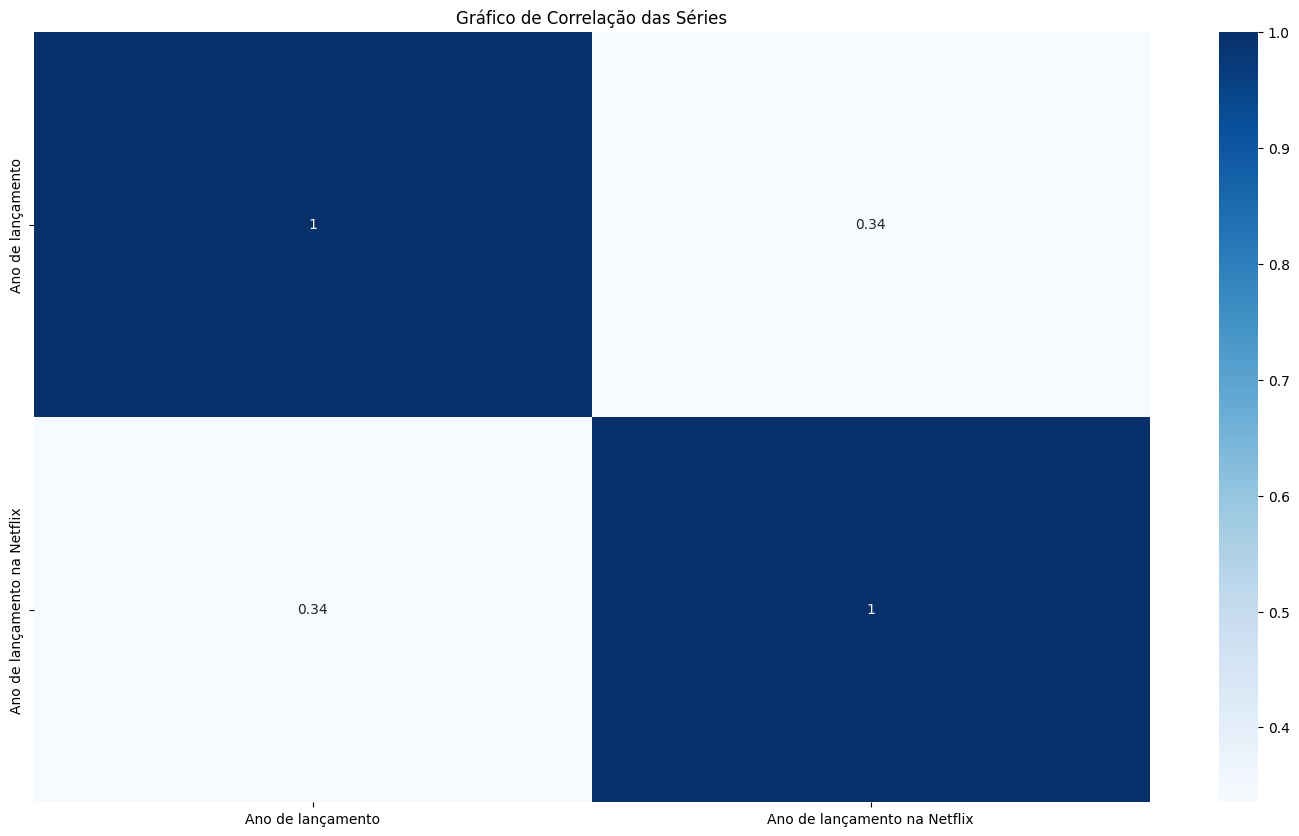

In [ ]:
df_quanti_serie = df_quanti_serie.rename(columns={'release_year': 'Ano de lançamento',
                        'year_added': 'Ano de lançamento na Netflix'})

fig, ax = plt.subplots(figsize = (18, 10))
correlation_matrix_serie = df_quanti_serie.corr()

sns.heatmap(correlation_matrix_serie, annot=True, cmap='Blues')
plt.title('Gráfico de Correlação das Séries')

Text(0, 0.5, 'Produção')

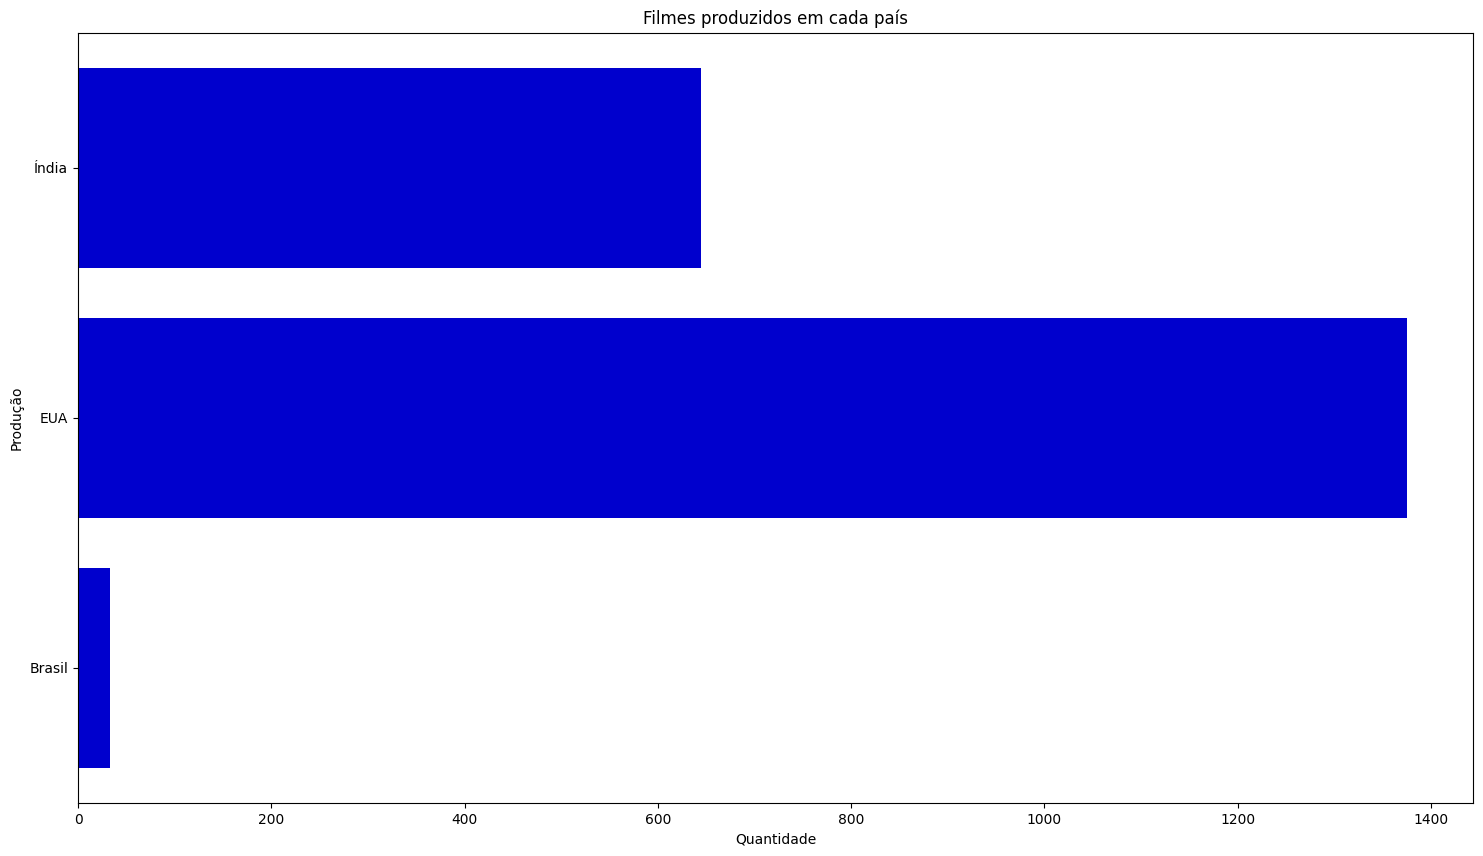

In [ ]:
filmes_brasil = df.loc[(df["type"] == "Movie") & (df["country"] == "Brazil")].shape[0]
filmes_eua = df.loc[(df["type"] == "Movie") & (df["country"] == "United States")].shape[0]
filmes_india = df.loc[(df["type"] == "Movie") & (df["country"] == "India")].shape[0]

nomes = ["Brasil", "EUA", "Índia"]
paises = [filmes_brasil, filmes_eua, filmes_india]

fig, ax = plt.subplots(figsize = (18, 10))
plt.barh(nomes, paises, color = "mediumblue")

plt.title("Filmes produzidos em cada país")
plt.xlabel("Quantidade")
plt.ylabel("Produção")

Text(0, 0.5, 'Países')

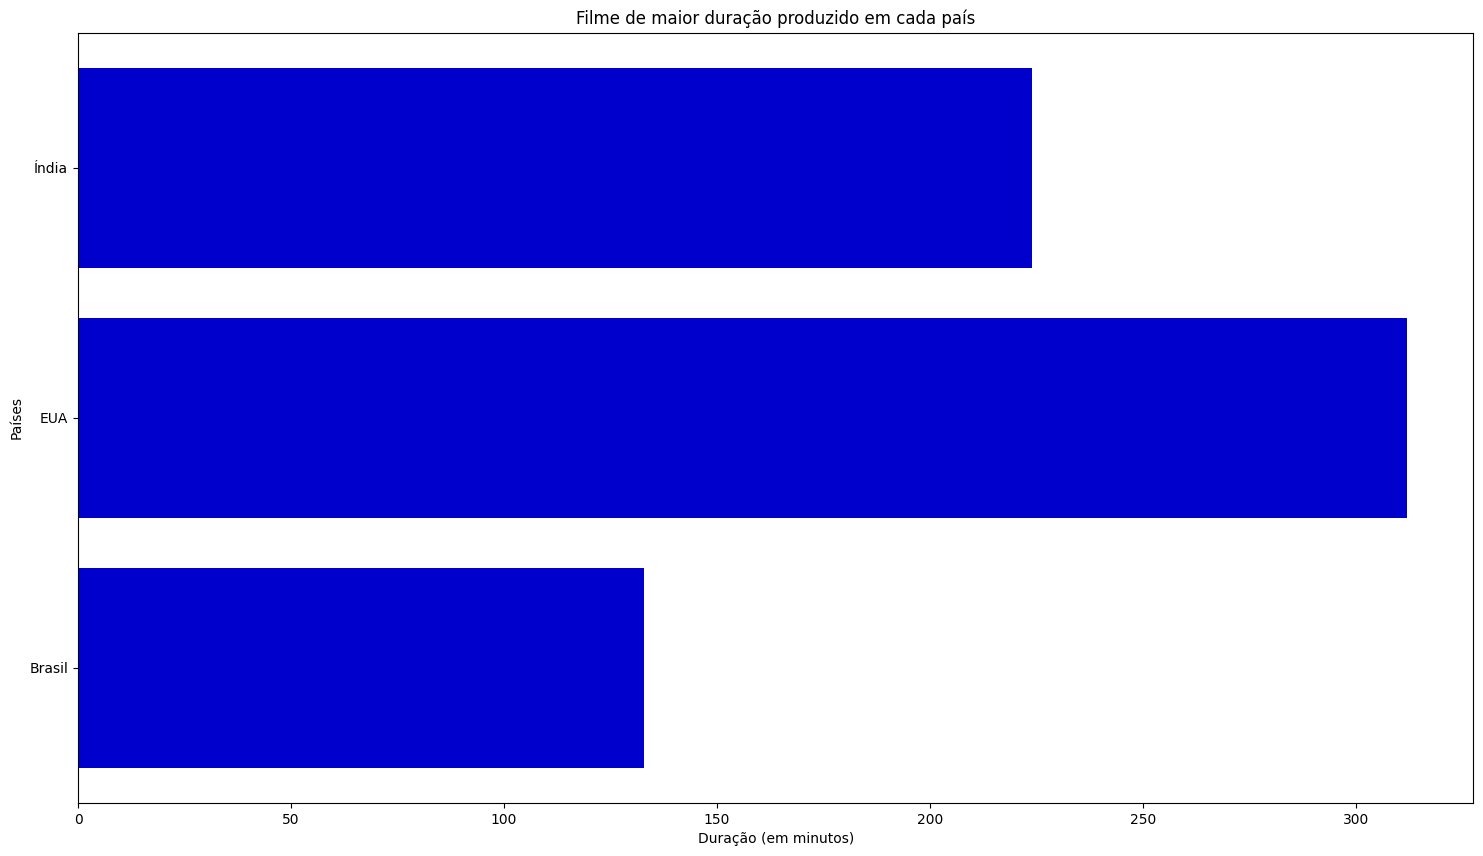

In [ ]:
brasil = df_filme[df_filme['country'] == 'Brazil']
eua = df_filme[df_filme['country'] == 'United States']
india = df_filme[df_filme['country'] == 'India']

duracao_brasil = brasil['movie_duration'].max()
duracao_eua = eua['movie_duration'].max()
duracao_india = india['movie_duration'].max()

nomes = ["Brasil", "EUA", "Índia"]
duracao = [duracao_brasil, duracao_eua, duracao_india]

fig, ax = plt.subplots(figsize = (18, 10))
plt.barh(nomes, duracao, color = "mediumblue")

plt.title("Filme de maior duração produzido em cada país")
plt.xlabel("Duração (em minutos)")
plt.ylabel("Países")

Text(0, 0.5, 'Quantidade de lançamentos')

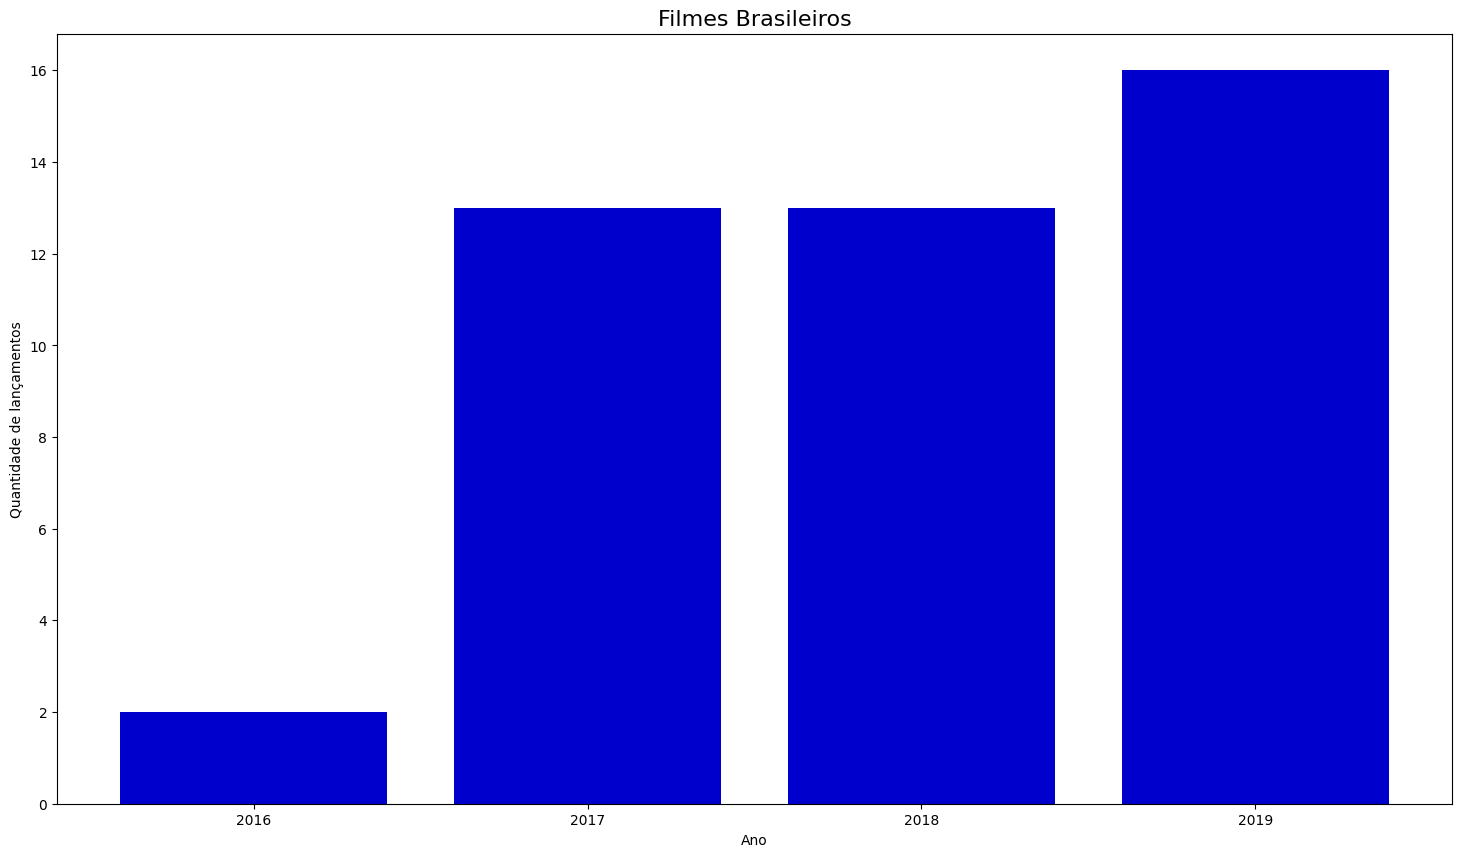

In [ ]:
df_brasil = df.loc[df["country"] == "Brazil"]

qtd_filmes_brasil = df_brasil["year_added"].unique()

fig, ax = plt.subplots(figsize = (18, 10))
ax.bar(qtd_filmes_brasil, df_brasil["year_added"].value_counts(), label="Filmes Brasileiros", color="mediumblue")

ax.set_title("Filmes Brasileiros", fontsize = 16)

plt.xticks(qtd_filmes_brasil)

ax.set_xlabel("Ano")
ax.set_ylabel("Quantidade de lançamentos")

**FILME DE MAIOR DURAÇÃO**

In [ ]:
filme_maior_duracao = df_filme.loc[df_filme['movie_duration'].idxmax()]
filme_maior_duracao

director                                                        NaN
cast              Fionn Whitehead, Will Poulter, Craig Parkinson...
country                                               United States
release_year                                                   2018
listed_in            Dramas, International Movies, Sci-Fi & Fantasy
type                                                          Movie
year_added                                                     2018
movie_duration                                                  312
Name: Black Mirror: Bandersnatch, dtype: object

**DIRETORES QUE FIZERAM MAIS FILMES**

In [ ]:
df_filme["director"].value_counts()

Raúl Campos, Jan Suter    18
Marcus Raboy              14
Jay Karas                 13
Jay Chapman               12
Johnnie To                 8
                          ..
Kunihiko Yuyama            1
Ranjit Jeyakodi            1
Ram                        1
Mark Herman                1
Sorin Dan Mihalcescu       1
Name: director, Length: 3007, dtype: int64

**TIPOS DE FILMES QUE MAIS APARECEM**

In [ ]:
df_filme["listed_in"].value_counts()

Documentaries                                                       297
Stand-Up Comedy                                                     265
Dramas, International Movies                                        238
Dramas, Independent Movies, International Movies                    170
Comedies, Dramas, International Movies                              157
                                                                   ... 
Horror Movies, Sci-Fi & Fantasy                                       1
Action & Adventure, Children & Family Movies, Independent Movies      1
Comedies, Dramas, Music & Musicals                                    1
International Movies, Romantic Movies, Sci-Fi & Fantasy               1
Children & Family Movies, Classic Movies, Comedies                    1
Name: listed_in, Length: 238, dtype: int64